# **Task 3**

In [ ]:
# import library
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

**Load Data MNIST**

In [ ]:
# Transform dan load data mnist
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

**Visualization**

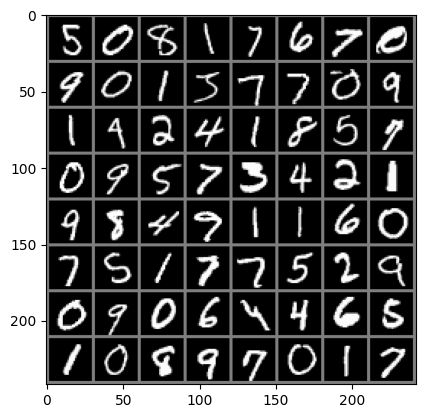

In [ ]:
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')  # Transpose to (height, width, channels)

dataiter = iter(train_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
plt.show()

**Modelling**

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

**Hyperparameter**

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

**Melatih model**

In [ ]:
def train(net, train_loader, optimizer, criterion, num_epochs):
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}")

num_epochs = 10
train(net, train_loader, optimizer, criterion, num_epochs)

Epoch 1, Loss: 0.4425594664252262
Epoch 2, Loss: 0.1760590774521454
Epoch 3, Loss: 0.12693037645720534
Epoch 4, Loss: 0.10428036765596553
Epoch 5, Loss: 0.0856714491302501
Epoch 6, Loss: 0.07538422349262545
Epoch 7, Loss: 0.06607301164490939
Epoch 8, Loss: 0.057787913471030426
Epoch 9, Loss: 0.05254915021352474
Epoch 10, Loss: 0.0452866228917283


**Evaluasi Model**

In [ ]:
correct = 0
total = 0
predictions = []
true_labels = []

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.numpy())
        true_labels.extend(labels.numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total

from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

cm = confusion_matrix(true_labels, predictions)
f1 = f1_score(true_labels, predictions, average='weighted')
precision = precision_score(true_labels, predictions, average='weighted')
recall = recall_score(true_labels, predictions, average='weighted')

print(f"Accuracy: {accuracy}%")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(cm)

Accuracy: 97.63%
F1 Score: 0.9762794192135552
Precision: 0.9763723408214053
Recall: 0.9763
Confusion Matrix:
[[ 973    0    3    0    0    0    1    1    2    0]
 [   0 1126    1    2    0    1    1    1    3    0]
 [   0    5 1004    2    5    0    2    7    7    0]
 [   1    1    1  994    0    2    0    5    3    3]
 [   1    0    2    0  960    0    2    5    1   11]
 [   5    0    0   15    2  849    6    3    3    9]
 [   7    4    1    1    8    5  927    0    5    0]
 [   2    7    6    3    0    0    0 1004    3    3]
 [   5    0    2    3    3    4    1    4  949    3]
 [   3    2    0    6   12    1    0    8    0  977]]


Diperoleh akurasi pada model sebesar 97,63%